In [1]:
'''
# hanya bisa digunakan di colab
!wget --no-check-certificate \
    https://figshare.com/ndownloader/files/10745875?private_link=a8c22c09f999f60a81bd \
    -O /tmp/melanoma_img.zip
'''

In [2]:
'''
# digunakan di colab
import os
import zipfile

os.makedirs('/tmp/dataset_melanoma')

local_zip = '/tmp/melanoma_img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/dataset_melanoma')
zip_ref.close()

os.chdir('/tmp/dataset_melanoma')
os.rename("Dermoscopic images of acral melanoma","Acral Melanoma")
os.rename("Dermoscopic images of benign nevi","Benign Nevi")
'''

'\n# digunakan di colab\nimport os\nimport zipfile\n\nos.makedirs(\'/tmp/dataset_melanoma\')\n\nlocal_zip = \'/tmp/melanoma_img.zip\'\nzip_ref = zipfile.ZipFile(local_zip, \'r\')\nzip_ref.extractall(\'/tmp/dataset_melanoma\')\nzip_ref.close()\n\nos.chdir(\'/tmp/dataset_melanoma\')\nos.rename("Dermoscopic images of acral melanoma","Acral Melanoma")\nos.rename("Dermoscopic images of benign nevi","Benign Nevi")\n'

### Code untuk di Jupyter notebook

In [3]:
%cd D:\DATA KULIAH\SEMESTER 7\Pembelajaran Mesin\Praktikum\Dataset

D:\DATA KULIAH\SEMESTER 7\Pembelajaran Mesin\Praktikum\Dataset


In [4]:
%ls

 Volume in drive D is DATA
 Volume Serial Number is F26E-2B50

 Directory of D:\DATA KULIAH\SEMESTER 7\Pembelajaran Mesin\Praktikum\Dataset

25/10/2021  11:08    <DIR>          .
25/10/2021  11:08    <DIR>          ..
25/10/2021  08:05    <DIR>          acral melanoma
25/10/2021  08:05    <DIR>          benign nevi
               0 File(s)              0 bytes
               4 Dir(s)  346.272.317.440 bytes free


In [5]:
import os
# path di jupyter
base_dataset_acral = 'D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/acral melanoma'
base_dataset_benign = 'D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/benign nevi'

print('Nama image acral melanoma: ',os.listdir(base_dataset_acral)[:1], ', Jumlah data :', len(os.listdir(base_dataset_acral)))
print('Nama image benign nevi: ',os.listdir(base_dataset_benign)[:1], ', Jumlah data :', len(os.listdir(base_dataset_benign)))

Nama image acral melanoma:  ['AM (1).JPG'] , Jumlah data : 350
Nama image benign nevi:  ['BN (1).jpg'] , Jumlah data : 374


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=15,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    brightness_range = [0.2,1.0],
                    zoom_range = 0.2,
                    fill_mode = 'nearest', 
                    validation_split=0.2)

val_datagen = ImageDataGenerator(
                    rescale=1/255, 
                    validation_split=0.2)

In [17]:
batch_size=32
train_dataset = train_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/',
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='binary')

validation_dataset = val_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/',
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='binary')

Found 580 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [25]:
model_1 = Sequential()

model_1.add(InputLayer(input_shape=[224,224,3]))
model_1.add(Conv2D(32, (3,3), strides=2, padding='same', activation='relu'))
model_1.add(MaxPool2D(2, 2, padding='same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64, (3,3), strides=2, padding='same', activation='relu'))
model_1.add(MaxPool2D(2, 2, padding='same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(128, (3,3), strides=2, padding='same', activation='relu'))
model_1.add(MaxPool2D(2, 2, padding='same'))
model_1.add(Dropout(0.2))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 128)        

In [26]:
model_1.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])
history_model_1 = model_1.fit(train_dataset, epochs = 100, steps_per_epoch = 580//batch_size, validation_steps = 144//batch_size ,validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 4 steps
Epoch 1/100
18/18 [==============================] - 51s 3s/step - loss: 0.6979 - acc: 0.5128 - val_loss: 0.7027 - val_acc: 0.5078
Epoch 2/100
18/18 [==============================] - 49s 3s/step - loss: 0.7016 - acc: 0.5018 - val_loss: 0.6958 - val_acc: 0.5078
Epoch 3/100
18/18 [==============================] - 49s 3s/step - loss: 0.6929 - acc: 0.5073 - val_loss: 0.6950 - val_acc: 0.5078
Epoch 4/100
18/18 [==============================] - 49s 3s/step - loss: 0.6903 - acc: 0.5328 - val_loss: 0.6939 - val_acc: 0.5156
Epoch 5/100
18/18 [==============================] - 50s 3s/step - loss: 0.6888 - acc: 0.5383 - val_loss: 0.6791 - val_acc: 0.5391
Epoch 6/100
18/18 [==============================] - 50s 3s/step - loss: 0.6836 - acc: 0.5566 - val_loss: 0.6822 - val_acc: 0.6094
Epoch 7/100
18/18 [==============================] - 50s 3s/step - loss: 0.6632 - acc: 0.5712 - val_loss: 0.7514 - val_acc:

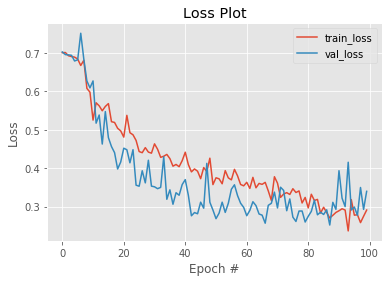

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history_model_1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

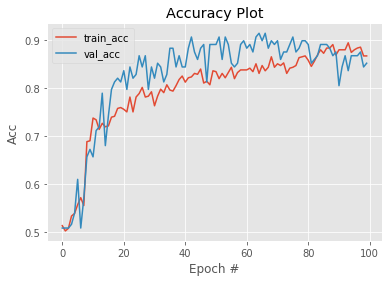

In [33]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history_model_1.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [45]:
model_1.save('model_1-fix.h5')

In [37]:
model_2 = Sequential()

model_2.add(InputLayer(input_shape=[224,224,3]))
model_2.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(Dropout(0.2))

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 112, 112, 64)      1792      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 16)        

In [38]:
model_2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])
history_model_2 = model_2.fit(train_dataset, epochs = 100, steps_per_epoch = 580//batch_size, validation_steps = 144//batch_size ,validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 4 steps
Epoch 1/100
18/18 [==============================] - 49s 3s/step - loss: 0.7028 - acc: 0.4927 - val_loss: 0.6910 - val_acc: 0.6016
Epoch 2/100
18/18 [==============================] - 48s 3s/step - loss: 0.6926 - acc: 0.5146 - val_loss: 0.7037 - val_acc: 0.5078
Epoch 3/100
18/18 [==============================] - 48s 3s/step - loss: 0.6873 - acc: 0.5438 - val_loss: 0.7037 - val_acc: 0.5078
Epoch 4/100
18/18 [==============================] - 48s 3s/step - loss: 0.6846 - acc: 0.5328 - val_loss: 0.6985 - val_acc: 0.5391
Epoch 5/100
18/18 [==============================] - 48s 3s/step - loss: 0.6922 - acc: 0.5073 - val_loss: 0.6955 - val_acc: 0.4531
Epoch 6/100
18/18 [==============================] - 48s 3s/step - loss: 0.6906 - acc: 0.5620 - val_loss: 0.6891 - val_acc: 0.4844
Epoch 7/100
18/18 [==============================] - 48s 3s/step - loss: 0.6837 - acc: 0.5420 - val_loss: 0.7104 - val_acc:

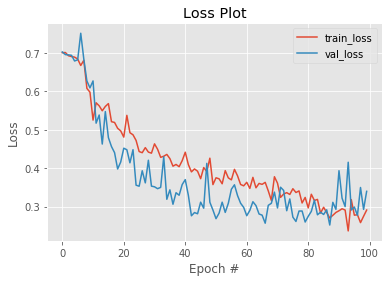

In [39]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history_model_1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

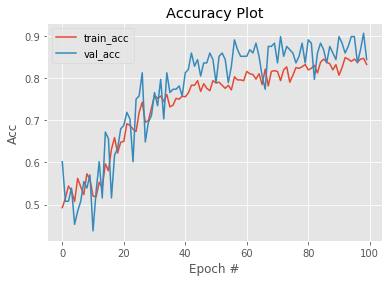

In [40]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history_model_2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [46]:
model_2.save('model_2-fix.h5')

In [43]:
%cd C:\Users\Fadhlan\Pembelajaran Mesin

C:\Users\Fadhlan\Pembelajaran Mesin
